In [14]:
df = pd.read_csv("C:/Users/muzaffer/Downloads/archive (12)/diabetes.csv")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Table
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split, cross_validate
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import confusion_matrix
# Import precision_score
from sklearn.metrics import precision_score
# Import roc_curve
from sklearn.metrics import roc_curve
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
# Import f1_score
from sklearn.metrics import f1_score

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Create feature dataset
X_Factor = df.drop(['Outcome'], axis=1)
X_Factor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
X_Factor = StandardScaler().fit_transform(X_Factor)
X_Factor

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
#Bartlett
#p-value should be 0 (statistically sig.)

chi_square_value,p_value=calculate_bartlett_sphericity(X_Factor)
print(chi_square_value, p_value)

948.2262232122064 1.2575496243946272e-181


In [19]:
#KMO

#Value should be 0.6<

kmo_all,kmo_model=calculate_kmo(X_Factor)

print(kmo_model)

0.5889870819164518


In [20]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(X_Factor)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [21]:
#GET EIGENVALUES
ev, v = fa.get_eigenvalues()

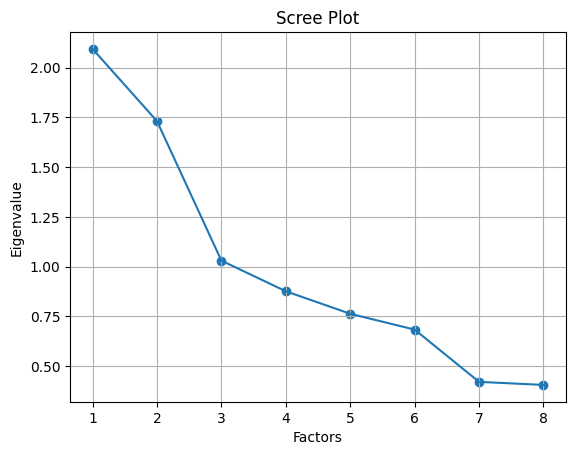

In [22]:
# SCREEPLOT (need pyplot)
plt.scatter(range(1,X_Factor.shape[1]+1),ev)
plt.plot(range(1,X_Factor.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(3, rotation="varimax", method='minres', use_smc=True)
fa.fit(X_Factor)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [24]:
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [25]:
fa.loadings_

array([[ 0.56793278, -0.04056361,  0.01305171],
       [ 0.27259909,  0.31367313,  0.17540022],
       [ 0.23751358,  0.05288537,  0.39343781],
       [-0.15843071,  0.33495646,  0.51203339],
       [-0.07159711,  0.98867588,  0.13829284],
       [ 0.02794715,  0.11665671,  0.70714979],
       [ 0.00505344,  0.18685415,  0.17803095],
       [ 0.9479974 ,  0.02603815,  0.02777331]])

In [26]:
fa.get_communalities()

array([0.32436339, 0.20346633, 0.21400288, 0.39947431, 1.00173106,
       0.51445066, 0.06663503, 0.90014841])

In [27]:
X_Factor = pd.DataFrame(X_Factor)

In [28]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=X_Factor.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
   Factor 1  Factor 2  Factor 3
0  0.567933 -0.040564  0.013052
1  0.272599  0.313673  0.175400
2  0.237514  0.052885  0.393438
3 -0.158431  0.334956  0.512033
4 -0.071597  0.988676  0.138293
5  0.027947  0.116657  0.707150
6  0.005053  0.186854  0.178031
7  0.947997  0.026038  0.027773


In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Create feature variable
X_PCA = df.drop(['Outcome'], axis=1)
X_PCA = StandardScaler().fit_transform(X_PCA)

In [31]:
feat_cols = ['feature'+str(i) for i in range(X_PCA.shape[1])]

In [32]:
normalised_X_PCA = pd.DataFrame(X_PCA,columns=feat_cols)

In [33]:
normalised_X_PCA.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732
767,-0.844885,-0.873019,0.046245,0.656358,-0.692891,-0.202129,-0.473785,-0.871374


In [34]:
pca_cus = PCA(n_components=2)
principalComponents_cus = pca_cus.fit_transform(normalised_X_PCA)

In [35]:
principal_cus_Df = pd.DataFrame(data = principalComponents_cus, columns = ['principal component 1', 'principal component 2'])

In [36]:
principal_cus_Df.tail()

,principal component 1,principal component 2
763,1.562085,1.923150
764,-0.100405,-0.614181
765,-0.283475,0.097065
766,-1.060324,0.837062
767,-0.839892,-1.151755


In [37]:
print('Explained variation per principal component: {}'.format(pca_cus.explained_variance_ratio_))

Explained variation per principal component: [0.26179749 0.21640127]


<Figure size 640x480 with 0 Axes>

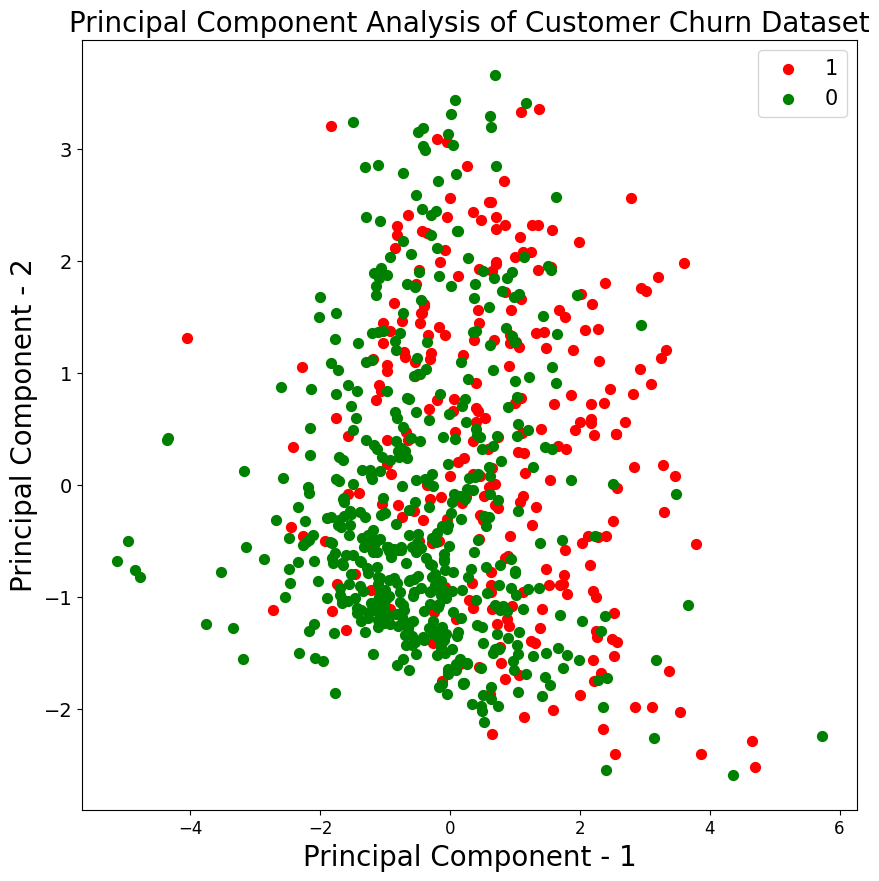

In [38]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Customer Churn Dataset",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Outcome'] == target
    plt.scatter(principal_cus_Df.loc[indicesToKeep, 'principal component 1']
               , principal_cus_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})